# Preprocessing and featurizing train data

In [2]:
%pip install jsonlines

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Loading Json Train Data
import jsonlines

phase = []
table_id = []
question = []
sql = []
with jsonlines.open("dataset-wikiSQL/train.jsonl") as f:
    for line in f.iter():
        phase.append(line["phase"])
        table_id.append(line["table_id"])
        question.append(line["question"])
        sql.append(line["sql"])

import pandas as pd

d = {"phase": phase, "table_id": table_id, "question": question, "sql": sql}
train_data = pd.DataFrame(d)
train_data
f.close()

In [4]:
train_data.columns=['phase','id','question','sql']
train_data.head()

,phase,id,question,sql
0,1,1-1000181-1,Tell me what the notes are for South Australia,"{'sel': 5, 'conds': [[3, 0, 'SOUTH AUSTRALIA']..."
1,1,1-1000181-1,What is the current series where the new serie...,"{'sel': 4, 'conds': [[5, 0, 'New series began ..."
2,1,1-1000181-1,What is the format for South Australia?,"{'sel': 2, 'conds': [[0, 0, 'South Australia']..."
3,1,1-1000181-1,Name the background colour for the Australian ...,"{'sel': 1, 'conds': [[0, 0, 'Australian Capita..."
4,1,1-10007452-3,how many times is the fuel propulsion is cng?,"{'sel': 3, 'conds': [[5, 0, 'CNG']], 'agg': 3}"


In [5]:
id = []
header = []
types = []
rows = []
with jsonlines.open("dataset-wikiSQL/train.tables.jsonl") as f:
    for line in f.iter():
        id.append((line["id"]))
        header.append((line["header"]))
        types.append((line["types"]))
        rows.append(line["rows"])

d = {"id": id, "header": header, "types": types, "rows": rows}
train_table_info = pd.DataFrame(d)
train_table_info

,id,header,types,rows
0,1-1000181-1,"[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya..."
1,1-10006830-1,"[Aircraft, Description, Max Gross Weight, Tota...","[text, text, text, text, text]","[[Robinson R-22, Light utility helicopter, 1,3..."
2,1-10007452-3,"[Order Year, Manufacturer, Model, Fleet Series...","[text, text, text, text, text, text]","[[1992-93, Gillig, Phantom (High Floor), 444-4..."
3,1-10015132-1,"[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Quincy Acy, 4, United States, Forward, 2012-..."
4,1-10015132-14,"[Player, No., Nationality, Position, Years in ...","[text, real, text, text, text, text]","[[Patrick O'Bryant, 13, United States, Center,..."
...,...,...,...,...
18580,2-18998832-2,"[Game, Date, Opponent, Venue, Result, Attendance]","[real, text, text, text, text, real]","[[1, 15 August 1987, Swindon Town, Home, 2–0, ..."
18581,2-18998832-5,"[Round (Leg), Date, Opponent, Venue, Result, A...","[text, text, text, text, text, real]","[[2 (1), 22 September 1987, Fulham, Away, 5–1,..."
18582,2-19001175-1,"[Country, Seasons, Championship Titles, Race e...","[text, text, text, text, real, real, real, rea...","[[United Kingdom, 1986, 0, 1, 0, 0, 0, 0, 0], ..."
18583,2-19008019-32,"[!Event, Round, Surface, Winner, Opponent, Res...","[real, text, text, text, text, text]","[[1., Wimbledon, Final, Grass, Roger Federer, ..."


In [6]:
#merging both tables
merged_data=train_data.merge(train_table_info,on='id')
merged_data

,phase,id,question,sql,header,types,rows
0,1,1-1000181-1,Tell me what the notes are for South Australia,"{'sel': 5, 'conds': [[3, 0, 'SOUTH AUSTRALIA']...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya..."
1,1,1-1000181-1,What is the current series where the new serie...,"{'sel': 4, 'conds': [[5, 0, 'New series began ...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya..."
2,1,1-1000181-1,What is the format for South Australia?,"{'sel': 2, 'conds': [[0, 0, 'South Australia']...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya..."
3,1,1-1000181-1,Name the background colour for the Australian ...,"{'sel': 1, 'conds': [[0, 0, 'Australian Capita...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya..."
4,1,1-10007452-3,how many times is the fuel propulsion is cng?,"{'sel': 3, 'conds': [[5, 0, 'CNG']], 'agg': 3}","[Order Year, Manufacturer, Model, Fleet Series...","[text, text, text, text, text, text]","[[1992-93, Gillig, Phantom (High Floor), 444-4..."
...,...,...,...,...,...,...,...
56350,2,2-12200756-16,What time was the match played with a score of...,"{'sel': 1, 'conds': [[5, 0, '3-2']], 'agg': 0}","[Date, Time, Competition, Opponent, Ground, Sc...","[text, text, text, text, text, text]","[[17 July 2007, 15:30 GMT, Friendly Match, Chi..."
56351,2,2-12200756-16,On which ground did the team play Aston Villa?,"{'sel': 4, 'conds': [[3, 0, 'aston villa']], '...","[Date, Time, Competition, Opponent, Ground, Sc...","[text, text, text, text, text, text]","[[17 July 2007, 15:30 GMT, Friendly Match, Chi..."
56352,2,2-12200756-16,What kind of competition was it at San Siro at...,"{'sel': 2, 'conds': [[4, 0, 'san siro'], [1, 0...","[Date, Time, Competition, Opponent, Ground, Sc...","[text, text, text, text, text, text]","[[17 July 2007, 15:30 GMT, Friendly Match, Chi..."
56353,2,2-12214488-1,What is the total number of decile for the red...,"{'sel': 5, 'conds': [[0, 0, 'redwood school']]...","[Name, Years, Gender, Locality, Authority, Dec...","[text, text, text, text, text, real]","[[Amesbury School, 1–6, Coed, Churton Park, St..."


In [7]:
# Converting dictionary sql answer into sql text for using in seq-seq model
from tqdm import tqdm

sql_in_text = []
aggregate = ["", "MAX", "MIN", "COUNT", "SUM", "AVG"]
operator = ["=", "<", ">"]
word_operator = ["eq", "lt", "gt"]

for i in tqdm(range(len(merged_data))):
    sql = merged_data.sql.iloc[i]
    col = merged_data.header.iloc[i][sql["sel"]] # col number
    agg = aggregate[sql["agg"]]
    cond_col = []
    cond_opr = []
    cond_value = []
    for j in sql["conds"]:
        cond_col.append(merged_data.header.iloc[i][j[0]])
        cond_opr.append(word_operator[j[1]])
        cond_value.append(j[2])
    resulted_sql = "select "
    if agg == "":
        resulted_sql += col + " where "
    else:
        resulted_sql += agg + "(" + col + ") where "

    for j in range(len(cond_col)):
        if j != 0:
            resulted_sql += "and "
        resulted_sql += cond_col[j] + " " + cond_opr[j] + " "
        resulted_sql += str(cond_value[j]) + " "

    sql_in_text.append(resulted_sql)

  0%|          | 0/56355 [00:00<?, ?it/s]

100%|██████████| 56355/56355 [00:01<00:00, 35451.54it/s]


In [8]:
merged_data['resulted_sql']=sql_in_text

In [9]:
merged_data

,phase,id,question,sql,header,types,rows,resulted_sql
0,1,1-1000181-1,Tell me what the notes are for South Australia,"{'sel': 5, 'conds': [[3, 0, 'SOUTH AUSTRALIA']...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya...",select Notes where Current slogan eq SOUTH AUS...
1,1,1-1000181-1,What is the current series where the new serie...,"{'sel': 4, 'conds': [[5, 0, 'New series began ...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya...",select Current series where Notes eq New serie...
2,1,1-1000181-1,What is the format for South Australia?,"{'sel': 2, 'conds': [[0, 0, 'South Australia']...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya...",select Format where State/territory eq South A...
3,1,1-1000181-1,Name the background colour for the Australian ...,"{'sel': 1, 'conds': [[0, 0, 'Australian Capita...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya...",select Text/background colour where State/terr...
4,1,1-10007452-3,how many times is the fuel propulsion is cng?,"{'sel': 3, 'conds': [[5, 0, 'CNG']], 'agg': 3}","[Order Year, Manufacturer, Model, Fleet Series...","[text, text, text, text, text, text]","[[1992-93, Gillig, Phantom (High Floor), 444-4...",select COUNT(Fleet Series (Quantity)) where Fu...
...,...,...,...,...,...,...,...,...
56350,2,2-12200756-16,What time was the match played with a score of...,"{'sel': 1, 'conds': [[5, 0, '3-2']], 'agg': 0}","[Date, Time, Competition, Opponent, Ground, Sc...","[text, text, text, text, text, text]","[[17 July 2007, 15:30 GMT, Friendly Match, Chi...",select Time where Score eq 3-2
56351,2,2-12200756-16,On which ground did the team play Aston Villa?,"{'sel': 4, 'conds': [[3, 0, 'aston villa']], '...","[Date, Time, Competition, Opponent, Ground, Sc...","[text, text, text, text, text, text]","[[17 July 2007, 15:30 GMT, Friendly Match, Chi...",select Ground where Opponent eq aston villa
56352,2,2-12200756-16,What kind of competition was it at San Siro at...,"{'sel': 2, 'conds': [[4, 0, 'san siro'], [1, 0...","[Date, Time, Competition, Opponent, Ground, Sc...","[text, text, text, text, text, text]","[[17 July 2007, 15:30 GMT, Friendly Match, Chi...",select Competition where Ground eq san siro an...
56353,2,2-12214488-1,What is the total number of decile for the red...,"{'sel': 5, 'conds': [[0, 0, 'redwood school']]...","[Name, Years, Gender, Locality, Authority, Dec...","[text, text, text, text, text, real]","[[Amesbury School, 1–6, Coed, Churton Park, St...",select COUNT(Decile) where Name eq redwood sch...


In [10]:
merged_data.to_csv('processed/merged_data.csv')

In [11]:
merged_data=pd.read_csv("processed/merged_data.csv")
merged_data.head()

,Unnamed: 0,phase,id,question,sql,header,types,rows,resulted_sql
0,0,1,1-1000181-1,Tell me what the notes are for South Australia,"{'sel': 5, 'conds': [[3, 0, 'SOUTH AUSTRALIA']...","['State/territory', 'Text/background colour', ...","['text', 'text', 'text', 'text', 'text', 'text']","[['Australian Capital Territory', 'blue/white'...",select Notes where Current slogan eq SOUTH AUS...
1,1,1,1-1000181-1,What is the current series where the new serie...,"{'sel': 4, 'conds': [[5, 0, 'New series began ...","['State/territory', 'Text/background colour', ...","['text', 'text', 'text', 'text', 'text', 'text']","[['Australian Capital Territory', 'blue/white'...",select Current series where Notes eq New serie...
2,2,1,1-1000181-1,What is the format for South Australia?,"{'sel': 2, 'conds': [[0, 0, 'South Australia']...","['State/territory', 'Text/background colour', ...","['text', 'text', 'text', 'text', 'text', 'text']","[['Australian Capital Territory', 'blue/white'...",select Format where State/territory eq South A...
3,3,1,1-1000181-1,Name the background colour for the Australian ...,"{'sel': 1, 'conds': [[0, 0, 'Australian Capita...","['State/territory', 'Text/background colour', ...","['text', 'text', 'text', 'text', 'text', 'text']","[['Australian Capital Territory', 'blue/white'...",select Text/background colour where State/terr...
4,4,1,1-10007452-3,how many times is the fuel propulsion is cng?,"{'sel': 3, 'conds': [[5, 0, 'CNG']], 'agg': 3}","['Order Year', 'Manufacturer', 'Model', 'Fleet...","['text', 'text', 'text', 'text', 'text', 'text']","[['1992-93', 'Gillig', 'Phantom (High Floor)',...",select COUNT(Fleet Series (Quantity)) where Fu...


In [12]:
print("question: ",merged_data.question.iloc[100])
print("headers: ",merged_data.header.iloc[100])
print("sql: ",merged_data.resulted_sql.iloc[100])

question:  What is the season year where the rank is 39?
headers:  ['Season', 'Timeslot ( ET )', 'Season premiere', 'Season finale', 'TV season', 'Rank', 'Viewers (millions)']
sql:  select TV season where Rank eq 39 


In [13]:
merged_data.head()

,Unnamed: 0,phase,id,question,sql,header,types,rows,resulted_sql
0,0,1,1-1000181-1,Tell me what the notes are for South Australia,"{'sel': 5, 'conds': [[3, 0, 'SOUTH AUSTRALIA']...","['State/territory', 'Text/background colour', ...","['text', 'text', 'text', 'text', 'text', 'text']","[['Australian Capital Territory', 'blue/white'...",select Notes where Current slogan eq SOUTH AUS...
1,1,1,1-1000181-1,What is the current series where the new serie...,"{'sel': 4, 'conds': [[5, 0, 'New series began ...","['State/territory', 'Text/background colour', ...","['text', 'text', 'text', 'text', 'text', 'text']","[['Australian Capital Territory', 'blue/white'...",select Current series where Notes eq New serie...
2,2,1,1-1000181-1,What is the format for South Australia?,"{'sel': 2, 'conds': [[0, 0, 'South Australia']...","['State/territory', 'Text/background colour', ...","['text', 'text', 'text', 'text', 'text', 'text']","[['Australian Capital Territory', 'blue/white'...",select Format where State/territory eq South A...
3,3,1,1-1000181-1,Name the background colour for the Australian ...,"{'sel': 1, 'conds': [[0, 0, 'Australian Capita...","['State/territory', 'Text/background colour', ...","['text', 'text', 'text', 'text', 'text', 'text']","[['Australian Capital Territory', 'blue/white'...",select Text/background colour where State/terr...
4,4,1,1-10007452-3,how many times is the fuel propulsion is cng?,"{'sel': 3, 'conds': [[5, 0, 'CNG']], 'agg': 3}","['Order Year', 'Manufacturer', 'Model', 'Fleet...","['text', 'text', 'text', 'text', 'text', 'text']","[['1992-93', 'Gillig', 'Phantom (High Floor)',...",select COUNT(Fleet Series (Quantity)) where Fu...


**Concatinating headers and questions**

In [14]:
# Concatinating question and headers
question_header = []
for i in range(len(merged_data)):
    question = merged_data.question.iloc[i]
    header = merged_data.header.iloc[i]
    a = header.split(",")
    
    for i in range(len(a)):
        a[i] = a[i].replace("[", "")
        a[i] = a[i].replace("'", "")
        a[i] = a[i].replace(",", "")
        a[i] = a[i].replace("]", "")
    for head in a:
        question += " " + head
    print(question_header)
    question_header.append(question)


In [15]:
len(question_header)

56355

In [1]:
print(question_header[0])

NameError: name 'question_header' is not defined

In [17]:
import re

**Preprocessing**

In [18]:
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase

def preprocess(text):
    # convert all the text into lower letters
    # use this function to remove the contractions: https://gist.github.com/anandborad/d410a49a493b56dace4f814ab5325bbd
    # remove all the spacial characters: except space ' '
    text = text.lower()
    text = decontractions(text)
    return text

In [19]:

preprocess_question_header=[]
for i in question_header:
  preprocess_question_header.append(preprocess(i))

In [20]:
preprocess_sql_in_text=[]
for i in merged_data['resulted_sql'].values:
  preprocess_sql_in_text.append(preprocess(i))

In [21]:
preprocess_sql_in_text[100]

'select tv season where rank eq 39 '

In [22]:
final_data=pd.DataFrame()
final_data['question_header']=question_header
final_data['sql']=preprocess_sql_in_text
final_data

,question_header,sql
0,Tell me what the notes are for South Australia...,select notes where current slogan eq south aus...
1,What is the current series where the new serie...,select current series where notes eq new serie...
2,What is the format for South Australia? State/...,select format where state/territory eq south a...
3,Name the background colour for the Australian ...,select text/background colour where state/terr...
4,how many times is the fuel propulsion is cng? ...,select count(fleet series (quantity)) where fu...
...,...,...
56350,What time was the match played with a score of...,select time where score eq 3-2
56351,On which ground did the team play Aston Villa?...,select ground where opponent eq aston villa
56352,What kind of competition was it at San Siro at...,select competition where ground eq san siro an...
56353,What is the total number of decile for the red...,select count(decile) where name eq redwood sch...


In [23]:
final_data.to_csv('processed/final_data.csv')

In [24]:
final_data.question_header.iloc[0]

'Tell me what the notes are for South Australia  State/territory  Text/background colour  Format  Current slogan  Current series  Notes'

**Featurizing**

In [25]:
final_data = pd.read_csv("processed/final_data.csv")
final_data.shape

(56355, 3)

In [26]:
# storing lengths of input and output from final data
input_lengths = final_data["question_header"].str.split().apply(len)
output_lengths = final_data["sql"].str.split().apply(len)

In [27]:
ci = 0
for i in input_lengths:
    if i > 60:
        ci += 1
co = 0
for i in output_lengths:
    if i > 35:
        co += 1
print("Number of words in input greater than 60:", ci)
print("Number of words in output greater than 35:", co)

Number of words in input greater than 60: 87
Number of words in output greater than 35: 7


In [28]:
#only 87 data points are greater than 60 words in input, so we choose max length of 60 in input
pos=[]
for i in range(len(input_lengths)):
  if(input_lengths[i]<=60 and output_lengths[i]<=35):
    pos.append(i)


In [29]:
data=final_data.iloc[pos]

In [30]:
data.to_csv("processed/questions_to_sql.csv")

In [31]:
data['sql_input'] = '<start> ' + data['sql'].astype(str)
data['sql_output'] = data['sql'].astype(str) + ' <end>'

/tmp/ipykernel_66875/2906321138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sql_input'] = '<start> ' + data['sql'].astype(str)
/tmp/ipykernel_66875/2906321138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sql_output'] = data['sql'].astype(str) + ' <end>'


In [32]:
data

,Unnamed: 0,question_header,sql,sql_input,sql_output
0,0,Tell me what the notes are for South Australia...,select notes where current slogan eq south aus...,<start> select notes where current slogan eq s...,select notes where current slogan eq south aus...
1,1,What is the current series where the new serie...,select current series where notes eq new serie...,<start> select current series where notes eq n...,select current series where notes eq new serie...
2,2,What is the format for South Australia? State/...,select format where state/territory eq south a...,<start> select format where state/territory eq...,select format where state/territory eq south a...
3,3,Name the background colour for the Australian ...,select text/background colour where state/terr...,<start> select text/background colour where st...,select text/background colour where state/terr...
4,4,how many times is the fuel propulsion is cng? ...,select count(fleet series (quantity)) where fu...,<start> select count(fleet series (quantity)) ...,select count(fleet series (quantity)) where fu...
...,...,...,...,...,...
56350,56350,What time was the match played with a score of...,select time where score eq 3-2,<start> select time where score eq 3-2,select time where score eq 3-2 <end>
56351,56351,On which ground did the team play Aston Villa?...,select ground where opponent eq aston villa,<start> select ground where opponent eq aston ...,select ground where opponent eq aston villa <...
56352,56352,What kind of competition was it at San Siro at...,select competition where ground eq san siro an...,<start> select competition where ground eq san...,select competition where ground eq san siro an...
56353,56353,What is the total number of decile for the red...,select count(decile) where name eq redwood sch...,<start> select count(decile) where name eq red...,select count(decile) where name eq redwood sch...


In [33]:
print(data.sql_input.iloc[0])
print(data.sql_output.iloc[0])


<start> select notes where current slogan eq south australia 
select notes where current slogan eq south australia  <end>


In [34]:
# for one sentence we will be adding <end> token so that the tokanizer learns the word <end>
# with this we can use only one tokenizer for both encoder output and decoder output
data.sql_input.iloc[0]= str(data.sql_input.iloc[0])+' <end>'

/tmp/ipykernel_66875/1482192947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sql_input.iloc[0]= str(data.sql_input.iloc[0])+' <end>'


In [35]:
data.sql_input.iloc[0]

'<start> select notes where current slogan eq south australia  <end>'

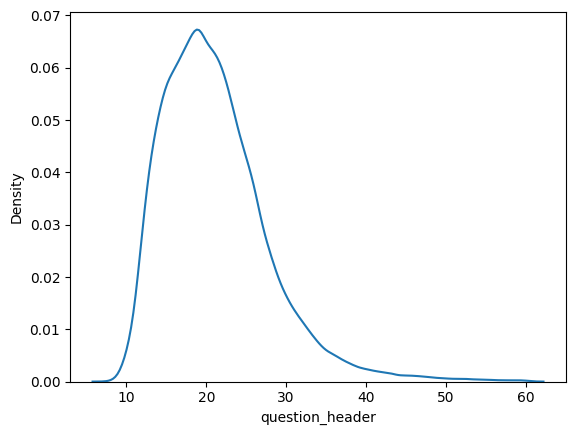

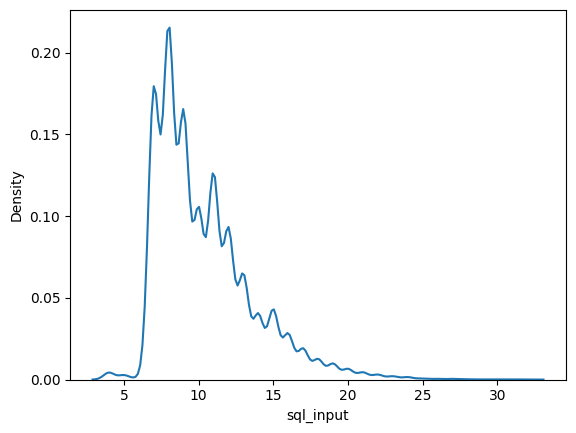

In [36]:
import matplotlib.pyplot as plt

que_lengths = data['question_header'].str.split().apply(len)
sql_lengths = data['sql_input'].str.split().apply(len)
import seaborn as sns
sns.kdeplot(que_lengths)
plt.show()
sns.kdeplot(sql_lengths)
plt.show()

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
tknizer_question = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n') # Hello, world! = [hello, world]
tknizer_question.fit_on_texts(data['question_header'].values)
tknizer_sql = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
tknizer_sql.fit_on_texts(data['sql_input'].values)

2024-02-27 19:20:46.219487: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 19:20:46.253480: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 19:20:46.253524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 19:20:46.254704: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 19:20:46.260904: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 19:20:46.262005: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [38]:
print(tknizer_question.word_index.keys())
print(tknizer_sql.word_index.keys())

dict_keys(['the', 'of', 'what', 'is', 'team', 'date', 'score', 'a', 'was', 'for', 'in', 'and', 'name', 'when', 'than', 'year', 'points', 'home', 'has', 'with', 'which', 'player', 'total', 'away', 'position', 'record', 'number', 'opponent', 'result', 'rank', 'attendance', 'game', '1', 'location', 'venue', 'time', 'by', 'country', 's', 'how', 'who', '2', 'no', 'season', 'title', 'many', 'high', 'round', 'that', 'on', 'to', 'club', 'played', '3', 'week', 'against', 'goals', 'series', 'had', 'less', 'average', 'tournament', 'place', 'original', 'episode', 'wins', '4', 'crowd', '5', 'as', 'at', 'did', 'first', 'class', 'school', '0', 'pick', 'an', 'city', 'laps', 'population', 'air', 'driver', 'type', 'winner', 'college', 'final', 'par', 'are', 'more', 'from', 'code', 'party', 'league', '10', 'where', 'larger', 'nationality', 'winning', 'directed', 'district', 'were', 'viewers', 'years', 'have', 'lost', '6', 'won', '7', '8', 'gold', 'up', 'bronze', 'written', 'event', 'assists', 'silver', '

In [39]:
vocab_size_question=len(tknizer_question.word_index.keys())
print(vocab_size_question)
vocab_size_sql=len(tknizer_sql.word_index.keys())
print(vocab_size_sql)

33933
29731


In [40]:
import pickle
with open('binaries/tokenizer_question.pickle', 'wb') as handle:
  pickle. dump(tknizer_question, handle, protocol=pickle. HIGHEST_PROTOCOL)
with open('binaries/tokenizer_sql.pickle', 'wb') as handle:
  pickle. dump(tknizer_sql, handle, protocol=pickle. HIGHEST_PROTOCOL)

In [41]:
import pickle
with open('binaries/tokenizer_question.pickle', 'rb') as handle:
  tknizer_question=pickle.load(handle)
with open('binaries/tokenizer_sql.pickle', 'rb') as handle:
  tknizer_sql=pickle.load(handle) 

In [42]:
# !wget https://www.dropbox.com/s/ddkmtqz01jc024u/glove.6B.100d.txt

In [43]:
import numpy as np
from tqdm import tqdm 

embeddings_index = dict()
embedding_file = open('glove.6B.100d.txt')

for line in tqdm(embedding_file):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
embedding_file.close()

# embedding_matrix: Contains embeddings for SQL Vocab Only, not Questions Vocab


embedding_matrix = np.zeros((vocab_size_sql+1,100))  #to convert each unique word in tokenzier's vocab  ==>100-d vector
for word, i in tqdm(tknizer_sql.word_index.items()):

    # arr.get(word) is same as arr[word]
    # embeddings_index.get('<start>') returns None
    # embeddings_index['<start>'] returns Error, so we're using .get
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)

400000it [00:05, 69918.99it/s]
100%|██████████| 29731/29731 [00:00<00:00, 653284.22it/s]

(29732, 100)


In [44]:
sql_vocab_words = list(tknizer_sql.word_index.keys())
print(sql_vocab_words)


['eq', 'where', 'select', '<start>', 'and', 'team', 'lt', 'date', 'gt', 'count', 'score', '1', 'year', '2', 'min', 'max', 'name', 'player', 'points', 'home', '3', '0', 'avg', 'of', '4', 'rank', 'opponent', 'sum', 'position', '5', 'away', 'total', 'record', 'venue', 's', 'title', 'attendance', 'result', 'in', '6', 'country', 'location', 'time', 'no', 'round', '8', '7', '9', '10', 'season', 'by', 'game', 'club', 'week', '11', '12', 'the', 'number', 'school', 'goals', 'to', 'wins', 'place', 'city', 'driver', '14', 'high', 'pick', 'laps', 'tournament', 'a', '16', '13', 'original', 'against', 'series', '15', 'college', 'gold', 'winner', 'bronze', 'class', 'grid', 'district', 'for', 'silver', 'final', 'first', 'population', '2008', '17', '18', 'crowd', 'league', '20', 'is', 'code', 'type', '2010', 'm', 'viewers', 'par', 'incumbent', 'state', 'played', 'area', 'up', 'winning', '25', 'lost', '30', '2009', '2011', 'cup', '19', 'episode', 'event', '22', 'nationality', 'air', 'competition', 'part

In [45]:
print(sql_vocab_words[1])
print(embedding_matrix[1])

where
[-0.30987999 -0.12544     0.41942999  0.35652    -1.14859998  0.30493999
 -0.36941001  0.34990001  0.010712    0.28399     0.98255998 -0.38113001
 -1.1753      0.48479     0.29229     1.04820001  0.62996    -0.14259
  0.28202     1.16139996  0.24311    -0.26881    -0.17342    -0.082042
  0.33794001 -0.16891    -0.091166    0.56783003 -0.32402     0.21863
  0.0025099   0.49087    -0.70376003 -0.23926    -0.41264001 -0.26429
  0.31851     0.89379001  0.40491    -0.43000999  0.61284    -0.47319999
 -0.65284002  0.21979    -0.18172    -0.14379001 -0.17554     0.65055001
 -0.23954999 -0.08806    -0.44955     0.008507   -0.26025    -0.048747
 -0.64572001  0.64183998 -0.15329    -0.74316001 -0.20699     0.18545
  0.43906999  0.13725001 -0.90526998 -0.13214999  0.22040001  0.0084921
  0.030455   -0.018893    0.96483999  0.0063498   0.094269   -0.064824
  0.77601999 -0.1848     -0.11437    -0.59899998  0.55961001 -0.076861
 -0.33974001 -0.039818    0.2525     -0.4831     -0.27285001 -0.39

In [46]:
embedding_matrix.shape

(29732, 100)

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
class Dataset:
    def __init__(self, data, tknizer_question, tknizer_sql, max_len):
        self.encoder_inps = data.question_header.values # NL Queries 
        self.decoder_inps = data.sql_input.values       # <start> Examples
        self.decoder_outs = data.sql_output.values      # <end>   Examples
        self.tknizer_question = tknizer_question
        self.tknizer_sql = tknizer_sql
        self.max_len = max_len

    def __getitem__(self, i):
        self.encoder_seq = self.tknizer_question.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tknizer_sql.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tknizer_sql.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=36, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=36, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)

    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps)) # [1, 2, 3 .. no. of question_headers] = (1, dataset_encoder_inps.examples)


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])    # train_dataset[0] == train_dataset.__getitem__(0)

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
        # we are creating data like ([italian, english_inp], english_out) these are already converted into seq
        return tuple([[batch[0],batch[1]],batch[2]])
    
        '''
            returns 
                (
                    [
                        [
                            batch[0],   # NL        index = [0][0][0]
                            batch[1]    # SQL_IN    index = [0][0][1]
                        ],
                        batch[2] # SQL_OUT          index = [0][1]
                    ]
                )
        '''

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

In [48]:

#max_length=61

train_dataset = Dataset(data, tknizer_question, tknizer_sql, 61)
train_dataloader = Dataloder(train_dataset, batch_size=64)
print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)

(64, 61) (64, 36) (64, 36)


In [49]:
# train_dataset[0] == train_dataset.__getitem__(0)

In [50]:
# (data.question_header.values)[0]
# tknizer_question.word_index
# train_dataset.__len__()
'''
    train_dataset.__getitem__ returns tuple
    (x, y, z)
    x = (1, maxLen) : For Question header
    y = (1, maxLen) : For SQL Input
    z = (1, maxLen) : For SQL Output

'''
x, y, z = train_dataset.__getitem__(0)
# print()

'''
    Explanation
        def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])    ---> RETURNS A TUPLE AT EVERY ITERATION, 

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
        # we are creating data like ([italian, english_inp], english_out) these are already converted into seq
        return tuple([[batch[0],batch[1]],batch[2]])
'''
x, y, z = train_dataset[0]
# x.shape
# y.shape
# z.shape
dataL = [train_dataset[0], train_dataset[1]] # appending
# print(dataL)
for idx, samples in enumerate((dataL)):
    print(f"Batch {idx} samples:")
    print(samples)


Batch 0 samples:
(array([[ 227,  223,    3,    1,  209,   89,   10,  357,  754,  146,  896,
        3435, 1516, 1466,  197,  318, 6295,  318,   58,  209,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int32), array([[    4,     3,   235,     2,   390, 13127,     1,   175,   430,
        13128,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0]],
      dtype=int32), array([[    3,   235,     2,   390, 13127,     1,   175,   430, 13128,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     

In [51]:
for idx, samples in enumerate(zip(*dataL)):
    print(f"Batch {idx} samples:")
    print(samples)

Batch 0 samples:
(array([[ 227,  223,    3,    1,  209,   89,   10,  357,  754,  146,  896,
        3435, 1516, 1466,  197,  318, 6295,  318,   58,  209,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int32), array([[   3,    4,    1,  318,   58,   96,    1,  252,   58, 1344,   11,
         378,  132,  146,  896, 3435, 1516, 1466,  197,  318, 6295,  318,
          58,  209,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int32))
Batch 1 samples:
(array([[    4,     3,   235,     2,   390, 13127,     1,   175,   430,
        13128,     0,     0,     

In [52]:
batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*dataL)]
batch


[array([[ 227,  223,    3,    1,  209,   89,   10,  357,  754,  146,  896,
         3435, 1516, 1466,  197,  318, 6295,  318,   58,  209,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0],
        [   3,    4,    1,  318,   58,   96,    1,  252,   58, 1344,   11,
          378,  132,  146,  896, 3435, 1516, 1466,  197,  318, 6295,  318,
           58,  209,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0]], dtype=int32),
 array([[    4,     3,   235,     2,   390, 13127,     1,   175,   430,
         13128,     0,     0,     0,     0,     0,     0,     0,     0,

In [53]:
import numpy as np

dataL = [
    (np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=np.int32),
     np.array([[10, 11, 12], [13, 14, 15], [16, 17, 18]], dtype=np.int32),
     np.array([[19, 20, 21], [22, 23, 24], [25, 26, 27]], dtype=np.int32)),
    
    (np.array([[3, 4, 1], [318, 58, 96], [1, 252, 58]], dtype=np.int32),
     np.array([[4, 3, 390], [76, 2, 235], [1, 145, 76]], dtype=np.int32),
     np.array([[3, 390, 76], [2, 235, 1], [145, 76, 2002]], dtype=np.int32))
]

# # Line 1: Direct iteration over batches
# print("Line 1:")
# for idx, samples in enumerate(dataL):
#     print(f"Batch {idx} samples:")
#     print(samples)


# # Line 2: Iteration over corresponding elements using zip(*dataL)
# print("\nLine 2:")
# for idx, samples in enumerate(zip(*dataL)):
#     print(f"Batch {idx} samples:")
#     print(samples)



In [54]:
d = train_dataloader.__getitem__(0)
d[0]
# train_dataloader.__len__()
# d.shape

[array([[227, 223,   3, ...,   0,   0,   0],
        [  3,   4,   1, ...,   0,   0,   0],
        [  3,   4,   1, ...,   0,   0,   0],
        ...,
        [  3,  89,   1, ...,   0,   0,   0],
        [  3,  89,   1, ...,   0,   0,   0],
        [  3,  89,   1, ...,   0,   0,   0]], dtype=int32),
 array([[   4,    3,  235, ...,    0,    0,    0],
        [   4,    3,  390, ...,    0,    0,    0],
        [   4,    3,  224, ...,    0,    0,    0],
        ...,
        [   4,    3, 1911, ...,    0,    0,    0],
        [   4,    3, 2003, ...,    0,    0,    0],
        [   4,    3, 1911, ...,    0,    0,    0]], dtype=int32)]

# Encoder_Decoder with Attention Layer

In [55]:
import tensorflow as tf
import numpy as np

In [56]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        self.vocab_size = inp_vocab_size
        
        self.embedding_dim = embedding_size   #==100
        self.input_length = input_length
        
        self.enc_units= lstm_size
        

    def build(self, input_shape):  #emb and lstm layers def
        #Initialize Embedding layer
        self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.embedding_dim, input_length=self.input_length,
                           mask_zero=True, name="embedding_layer_encoder")
        #Intialize Encoder LSTM layer
        self.lstm = LSTM(self.enc_units, return_state=True, return_sequences=True, name="Encoder_LSTM") 
        

    def call(self,input_sequence,states,training=True):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        input_embedd= self.embedding(input_sequence)
        self.lstm_output, self.lstm_state_h,self.lstm_state_c = self.lstm(input_embedd,initial_state=states)
        return self.lstm_output, self.lstm_state_h,self.lstm_state_c
    def initialize_states(self,batch_size):
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''
      state_h=tf.zeros((batch_size,self.enc_units))
      state_c=tf.zeros((batch_size,self.enc_units))
      return state_h, state_c
        
    

    

In [57]:
#https://medium.com/analytics-vidhya/neural-machine-translation-using-bahdanau-attention-mechanism-d496c9be30c3
class Attention(tf.keras.layers.Layer):
  '''
    Class the calculates score based on the scoring_function using Bahdanu attention mechanism.
  '''
  def __init__(self,scoring_function, att_units):


    # Please go through the reference notebook and research paper to complete the scoring functions
    super().__init__()
    self.scoring_function=scoring_function
    self.att_units=att_units
    
    if self.scoring_function=='dot':
      # Intialize variables needed for Dot score function here
      self.dot=tf.keras.layers.Dot(axes=(1,2))

    if self.scoring_function == 'general':
      # Intialize variables needed for General score function here
      self.dot=tf.keras.layers.Dot(axes=2)
      self.W=tf.keras.layers.Dense(att_units)
    
    elif self.scoring_function == 'concat':
      # Intialize variables needed for Concat score function here
      self.W1 = tf.keras.layers.Dense(att_units)
      self.W2 = tf.keras.layers.Dense(att_units)
      self.V = tf.keras.layers.Dense(1)
  
  
  def call(self,decoder_hidden_state,encoder_output):
    '''
      Attention mechanism takes two inputs current step -- decoder_hidden_state and all the encoder_outputs.
      * Based on the scoring function we will find the score or similarity between decoder_hidden_state and encoder_output.
        Multiply the score function with your encoder_outputs to get the context vector.
        Function returns context vector and attention weights(softmax - scores)
    '''
    
    if self.scoring_function == 'dot':
        # Implement Dot score function here
        score=self.dot([decoder_hidden_state,encoder_output])
        attention_weights = tf.nn.softmax(score)
        context_vector=tf.matmul(attention_weights,encoder_output)
        context_vector = tf.reduce_sum(context_vector, axis=1)
        #attention_weights=tf.convert_to_tensor(attention_weights)
        #attention_weights=tf.reshape(attention_weights,(tf.shape(attention_weights)[0],tf.shape(attention_weights)[2],tf.shape(attention_weights)[1]))
        attention_weights=tf.expand_dims(attention_weights,axis=2)
        return context_vector, attention_weights

    elif self.scoring_function == 'general':
        decoder_hidden_state = tf.expand_dims(decoder_hidden_state, 1)
        #score=self.dot([decoder_hidden_state,self.W(encoder_output)])
        enc_dense=self.W(encoder_output)
        similarity=tf.matmul(decoder_hidden_state,enc_dense,transpose_b=True)
        attention_weights = tf.nn.softmax(similarity, axis=2)
        context_vector = tf.matmul(attention_weights,encoder_output)
        context_vector = tf.reduce_sum(context_vector, axis=1)
        attention_weights=tf.transpose(attention_weights,perm=[0,2,1])
        return context_vector, attention_weights
    
    elif self.scoring_function == 'concat':
        decoder_hidden_state = tf.expand_dims(decoder_hidden_state, 1)
        score = self.V(tf.nn.tanh(self.W1(decoder_hidden_state)) + self.W2(encoder_output))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights*encoder_output
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [58]:
class One_Step_Decoder(tf.keras.Model):
  def __init__(self,tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):

    # Initialize decoder embedding layer, LSTM and any other objects needed
    super().__init__()
    self.vocab_size=tar_vocab_size
    self.embedding_dim=embedding_dim
    self.input_length=input_length
    self.dec_units=dec_units
    self.score_fun=score_fun
    self.att_units=att_units

  def build(self,input_shape):
    self.embedding = tf.keras.layers.Embedding(self.vocab_size, output_dim=self.embedding_dim,input_length=self.input_length)
    self.lstm = tf.keras.layers.LSTM(self.dec_units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
    self.attention = Attention(self.score_fun,self.att_units)
    self.fc = Dense(self.vocab_size)

  def call(self,input_to_decoder, encoder_output, state_h,state_c):
    '''
        One step decoder mechanisim step by step:
      A. Pass the input_to_decoder to the embedding layer and then get the output(batch_size,1,embedding_dim)
      B. Using the encoder_output and decoder hidden state, compute the context vector.
      C. Concat the context vector with the step A output
      D. Pass the Step-C output to LSTM/GRU and get the decoder output and states(hidden and cell state)
      E. Pass the decoder output to dense layer(vocab size) and store the result into output.
      F. Return the states from step D, output from Step E, attention weights from Step -B
    '''
    #print(input_to_decoder.shape)
    x=self.embedding(input_to_decoder)
    context_vector, attention_weights = self.attention(state_h, encoder_output)
    #print(x.shape,context_vector.shape)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
    init_states=[state_h,state_c]
    output, state_h,state_c = self.lstm(x,initial_state=init_states)
    output = self.fc(output)
    return tf.reduce_sum(output,1), state_h,state_c,attention_weights,context_vector

In [59]:
class Decoder(tf.keras.Model):
    def __init__(self,out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
      #Intialize necessary variables and create an object from the class onestepdecoder
      super().__init__()
      self.vocab_size = out_vocab_size+1
      self.embedding_dim = embedding_dim
      self.dec_units = dec_units
      self.input_length = input_length
      self.att_units=att_units
      self.score_fun=score_fun
      # we are using embedding_matrix and not training the embedding layer
      self.one_step_decoder=One_Step_Decoder(self.vocab_size,self.embedding_dim,self.input_length,self.dec_units,self.score_fun,self.att_units)
      
    def call(self, input_to_decoder,encoder_output,decoder_hidden_state,decoder_cell_state ):

        #Initialize an empty Tensor array, that will store the outputs at each and every time step
        #Create a tensor array as shown in the reference notebook
        
        #Iterate till the length of the decoder input
            # Call onestepdecoder for each token in decoder_input
            # Store the output in tensorarray
        # Return the tensor array
        output_tensor_array=tf.TensorArray(tf.float32,size=36)
        for timestamp in range(self.input_length):
          #print(timestamp)
          output,state_h,state_c,attention_weights,context_vector=self.one_step_decoder(input_to_decoder[:,timestamp:timestamp+1],encoder_output,decoder_hidden_state,decoder_cell_state)            
          output_tensor_array=output_tensor_array.write(timestamp,output)
        output_tensor_array=tf.transpose(output_tensor_array.stack(),[1,0,2])
        return output_tensor_array

In [60]:
#decoder-(out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units)
#encoder(inp_vocab_size,embedding_size,lstm_size,input_length)
class Encoder_decoder(tf.keras.Model):
  def __init__(self,inp_vocab_size,embedding_size,input_length,lstm_size,out_vocab_size,batch_size,score_fun,att_units):
    #Intialize objects from encoder decoder
    super().__init__() # https://stackoverflow.com/a/27134600/4084039
    self.vocab_size = inp_vocab_size
    self.embedding_size = embedding_size 
    self.input_length = input_length
    self.enc_units= lstm_size
    self.out_vocab_size=out_vocab_size
    self.score_fun=score_fun
    self.att_units=att_units
    self.batch_size=batch_size
    self.encoder = Encoder(inp_vocab_size=self.vocab_size, embedding_size=self.embedding_size,input_length=61, lstm_size=self.enc_units)
    self.decoder = Decoder(out_vocab_size=self.out_vocab_size, embedding_dim=self.embedding_size, dec_units=self.enc_units,input_length=36,score_fun=self.score_fun,att_units=self.att_units)
        
  
  def call(self,data,*params):
    
    #Intialize encoder states, Pass the encoder_sequence to the embedding layer
    # Decoder initial states are encoder final states, Initialize it accordingly
    # Pass the decoder sequence,encoder_output,decoder states to Decoder
    # return the decoder output 

    input,output = data[0], data[1]
    initial_state=self.encoder.initialize_states(self.batch_size)
    encoder_output, encoder_h, encoder_c = self.encoder(input,initial_state)
    decoder_output= self.decoder(output,encoder_output,encoder_h,encoder_c)
    return decoder_output 

In [61]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,reduction='none')
def custom_lossfunction(targets,logits):

  # Custom loss function that will not consider the loss for padded zeros.
  # Refer https://www.tensorflow.org/tutorials/text/nmt_with_attention#define_the_optimizer_and_the_loss_function
  mask=tf.math.logical_not(tf.math.equal(targets,0))
  loss=loss_object(targets,logits)
  dtype_loss=loss.dtype
  mask=tf.cast(mask,dtype=dtype_loss)
  loss=loss*mask
  return tf.reduce_mean(loss)

In [62]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import datetime
#file path, it saves the model in the 'model_save' folder and we are naming model with epoch number 
filepath="model_best.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='auto',
                             save_weights_only=True)


# https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/get_started.ipynb#scrollTo=Ao7fJW1Pyiza
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, 
                                                      histogram_freq=1)

In [63]:
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0.0, 
                          patience=5, 
                          verbose=1, 
                          mode='auto')
callback_list = [checkpoint,earlystop, tensorboard_callback]

# Featurizing and fitting along validation data

In [64]:
#Loading Json Train Data
import jsonlines
phase=[]
table_id=[]
question=[]
sql=[]
with jsonlines.open("./dataset-wikiSQL/dev.jsonl") as f:
  for line in f.iter():
    phase.append(line['phase'])
    table_id.append(line['table_id'])
    question.append(line['question'])
    sql.append(line['sql'])
import pandas as pd
d={'phase':phase,'table_id':table_id,'question':question,'sql':sql}
val_data=pd.DataFrame(d)
val_data
f.close()

In [65]:
val_data.columns=['phase','id','question','sql']

In [66]:
import jsonlines
id=[]
header=[]
types=[]
rows=[]
with jsonlines.open("./dataset-wikiSQL/dev.tables.jsonl") as f:
  for line in f.iter():
    id.append((line['id']))
    header.append((line['header']))
    types.append((line['types']))
    rows.append(line['rows'])
d={'id':id,'header':header,'types':types,'rows':rows}
val_table_info=pd.DataFrame(d)
val_table_info

,id,header,types,rows
0,1-10015132-11,"[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa..."
1,1-10015132-9,"[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Jarrett Jack, 1, United States, Guard, 2009-..."
2,1-10026563-1,[Entered office as Head of State or Government...,"[text, text, text, text, text]","[[16 October 1964, 15 November 1975, 5 April 1..."
3,1-1008653-1,"[Country ( exonym ), Capital ( exonym ), Count...","[text, text, text, text, text]","[[Afghanistan, Kabul, Afghanestan افغانستان, K..."
4,1-10088101-1,"[No. in set, No. in series, Title, Directed by...","[real, real, text, text, text, text, text]","[[1, 174, "" Per Manum "", Kim Manners, Chris Ca..."
...,...,...,...,...
2711,2-18999963-3,"[Year, Program, Role, Episode, First aired]","[real, text, text, text, text]","[[1957, Alfred Hitchcock Presents, Charles Cou..."
2712,2-19000748-1,"[Round, Pick, Player, Nationality, College/Jun...","[real, real, text, text, text]","[[1, 3., Rick Hampton, Canada, St. Catharines ..."
2713,2-19000872-1,"[Round, Pick, Player, Nationality, College/jun...","[real, real, text, text, text]","[[1, 5., Mike Crombeen, Canada, Kingston Canad..."
2714,2-19001175-2,"[Country, Total Drivers, Championship Titles, ...","[text, real, text, text, real, real, real, rea...","[[Argentina, 11, 0, 119 (113), 0, 0, 3, 2, 64]..."


In [67]:
val_merged_data=val_data.merge(val_table_info,on='id')
val_merged_data

,phase,id,question,sql,header,types,rows
0,1,1-10015132-11,What position does the player who played for b...,"{'sel': 3, 'conds': [[5, 0, 'Butler CC (KS)']]...","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa..."
1,1,1-10015132-11,How many schools did player number 3 play at?,"{'sel': 5, 'conds': [[1, 0, '3']], 'agg': 3}","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa..."
2,1,1-10015132-11,What school did player number 21 play for?,"{'sel': 5, 'conds': [[1, 0, '21']], 'agg': 0}","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa..."
3,1,1-10015132-11,Who is the player that wears number 42?,"{'sel': 0, 'conds': [[1, 0, '42']], 'agg': 0}","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa..."
4,1,1-10015132-11,What player played guard for toronto in 1996-97?,"{'sel': 0, 'conds': [[3, 0, 'Guard'], [4, 0, '...","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa..."
...,...,...,...,...,...,...,...
8416,2,2-12206617-2,"Which loss has an attendance greater than 49,6...","{'sel': 3, 'conds': [[4, 1, '49,688'], [5, 0, ...","[Date, Opponent, Score, Loss, Attendance, Record]","[text, text, text, text, real, text]","[[April 8, Red Sox, 6 - 2, Stieb (0-1), 50,114..."
8417,2,2-12206617-2,What is the largest attendance that has tigers...,"{'sel': 4, 'conds': [[1, 0, 'tigers'], [3, 0, ...","[Date, Opponent, Score, Loss, Attendance, Record]","[text, text, text, text, real, text]","[[April 8, Red Sox, 6 - 2, Stieb (0-1), 50,114..."
8418,2,2-12601141-1,Which party has Peter A. Quinn as a representa...,"{'sel': 3, 'conds': [[0, 0, 'peter a. quinn']]...","[Representative, Years, State, Party, Lifespan]","[text, text, text, text, text]","[[John A. Quackenbush, 1889–1893, New York, Re..."
8419,2,2-12601141-1,Which state does Jimmy Quillen represent?,"{'sel': 2, 'conds': [[0, 0, 'jimmy quillen']],...","[Representative, Years, State, Party, Lifespan]","[text, text, text, text, text]","[[John A. Quackenbush, 1889–1893, New York, Re..."


In [68]:
#Converting dictionary sql answer into sql text for using in seq-seq model
from tqdm import tqdm 
sql_in_text=[]
aggregate=['','MAX','MIN','COUNT','SUM','AVG']
operator=['=','<','>']
word_operator=['eq','lt','gt']

for i in tqdm(range(len(val_merged_data))):
  sql=val_merged_data.sql.iloc[i]
  col=val_merged_data.header.iloc[i][sql['sel']]
  agg=aggregate[sql['agg']]
  cond_col=[]
  cond_opr=[]
  cond_value=[]
  for j in sql['conds']:
    cond_col.append(val_merged_data.header.iloc[i][j[0]])
    cond_opr.append(word_operator[j[1]])
    cond_value.append(j[2])
  resulted_sql="select "
  if(agg==''):
    resulted_sql+=col+" where "
  else:
    resulted_sql+=agg+"("+col+") where "

  for j in range(len(cond_col)):
    if(j!=0):
      resulted_sql+="and "
    resulted_sql+=cond_col[j]+' '+cond_opr[j]+' '
    resulted_sql+=str(cond_value[j])+' '

  sql_in_text.append(resulted_sql)

100%|██████████| 8421/8421 [00:00<00:00, 34757.58it/s]


In [69]:
val_merged_data['resulted_sql']=sql_in_text

In [70]:
#Concatinating question and headers
question_header=[]
for i in range(len(val_merged_data)):
  question=val_merged_data.question.iloc[i]
  header=val_merged_data.header.iloc[i]
  '''a=header.split(',')
  for i in range(len(a)):
    a[i]=a[i].replace('[','')
    a[i]=a[i].replace("'",'')
    a[i]=a[i].replace(',','')
    a[i]=a[i].replace(']','')'''
  for head in header: 
    question+=' '+head
  question_header.append(question)

In [71]:
import re
preprocess_question_header=[]
for i in question_header:
  preprocess_question_header.append(preprocess(i))

In [72]:
preprocess_sql_in_text=[]
for i in val_merged_data['resulted_sql'].values:
  preprocess_sql_in_text.append(preprocess(i))

In [73]:
val_final_data=pd.DataFrame()
val_final_data['question_header']=question_header
val_final_data['sql']=preprocess_sql_in_text
val_final_data

,question_header,sql
0,What position does the player who played for b...,select position where school/club team eq butl...
1,How many schools did player number 3 play at? ...,select count(school/club team) where no. eq 3
2,What school did player number 21 play for? Pla...,select school/club team where no. eq 21
3,Who is the player that wears number 42? Player...,select player where no. eq 42
4,What player played guard for toronto in 1996-9...,select player where position eq guard and year...
...,...,...
8416,"Which loss has an attendance greater than 49,6...","select loss where attendance lt 49,688 and rec..."
8417,What is the largest attendance that has tigers...,select max(attendance) where opponent eq tiger...
8418,Which party has Peter A. Quinn as a representa...,select party where representative eq peter a. ...
8419,Which state does Jimmy Quillen represent? Repr...,select state where representative eq jimmy qui...


In [74]:
val_final_data.to_csv('val_final_data.csv')

In [75]:
val_final_data=pd.read_csv('val_final_data.csv')

In [76]:
pos=[]
for i in range(len(val_final_data.question_header)):
  #print(len(val_final_data.question_header.iloc[i].split()),len(val_final_data.sql.iloc[i].split()))
  if(len(val_final_data.question_header.iloc[i].split())<=60 and len(val_final_data.sql.iloc[i].split())<=35):
    pos.append(i)

In [77]:
len(pos)

8393

In [78]:
data=val_final_data.iloc[pos]

In [79]:
data['sql_input'] = '<start> ' + data['sql'].astype(str)
data['sql_output'] = data['sql'].astype(str) + ' <end>'

/tmp/ipykernel_66875/2906321138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sql_input'] = '<start> ' + data['sql'].astype(str)
/tmp/ipykernel_66875/2906321138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sql_output'] = data['sql'].astype(str) + ' <end>'


In [80]:
data.shape

(8393, 5)

In [81]:
#max_length=61
val_dataset = Dataset(data, tknizer_question, tknizer_sql, 61)
val_dataloader = Dataloder(val_dataset, batch_size=64)
print(val_dataloader[0][0][0].shape, val_dataloader[0][0][1].shape, val_dataloader[0][1].shape)

(64, 61) (64, 36) (64, 36)


**Training with validation dataset**

In [85]:
from keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

model  = Encoder_decoder(
    input_length=36,
    out_vocab_size=vocab_size_sql,
    inp_vocab_size=vocab_size_question,
    embedding_size=100,
    lstm_size=64,
    batch_size=64,
    score_fun='dot',
    att_units=64,
)

optimizer = tf.keras.optimizers.Adam(0.001)

model.compile(
    optimizer=optimizer,
    loss=custom_lossfunction,
    # metrics=['accuracy', 'precision', 'recall']
)

train_steps=56266//64
valid_steps=8393//64



ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [89]:
# if tf.config.list_physical_devices('GPU'):
#     print("GPU is available")
#     for gpu in tf.config.experimental.list_physical_devices('GPU'):
#         tf.config.experimental.set_memory_growth(gpu, True)
# else:
#     print("GPU is not available")


[]

In [87]:

model.fit(
    train_dataloader, 
    steps_per_epoch=train_steps, 
    batch_size=64,
    epochs=40, 
    validation_data=val_dataloader, 
    validation_steps=valid_steps,
    callbacks=callback_list, 
    # verbose=2
)
model.summary()  


Epoch 1/40
180/879 [=====>........................] - ETA: 6:43 - loss: 1.7671

KeyboardInterrupt: 

**Featurizing Validation Data**

# Checking model metric on Test Data

In [ ]:
#Loading Json Train Data
!pip install jsonlines
import jsonlines
phase=[]
table_id=[]
question=[]
sql=[]
with jsonlines.open("test.jsonl") as f:
  for line in f.iter():
    phase.append(line['phase'])
    table_id.append(line['table_id'])
    question.append(line['question'])
    sql.append(line['sql'])
import pandas as pd
d={'phase':phase,'table_id':table_id,'question':question,'sql':sql}
test_data=pd.DataFrame(d)
test_data
f.close()

In [ ]:
test_data.columns=['phase','id','question','sql']

In [ ]:
import jsonlines
id=[]
header=[]
types=[]
rows=[]
with jsonlines.open("test.tables.jsonl") as f:
  for line in f.iter():
    id.append((line['id']))
    header.append((line['header']))
    types.append((line['types']))
    rows.append(line['rows'])
d={'id':id,'header':header,'types':types,'rows':rows}
test_table_info=pd.DataFrame(d)
test_table_info

,id,header,types,rows
0,1-10015132-16,"[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Aleksandar Radojević, 25, Serbia, Center, 19..."
1,1-10083598-1,"[No, Date, Round, Circuit, Pole Position, Fast...","[real, text, text, text, text, text, text, text]","[[1, 24 February, Qatar, Losail, Kevin Curtain..."
2,1-1013129-2,"[Pick, Player, Position, Nationality, NHL team...","[real, text, text, text, text, text]","[[27, Rhett Warrener, Defence, Canada, Florida..."
3,1-1013129-3,"[Pick, Player, Position, Nationality, NHL team...","[real, text, text, text, text, text]","[[53, Corey Neilson, Defence, Canada, Edmonton..."
4,1-1014206-2,"[#, Shipyard, Laid down, Launched, Commissione...","[text, text, text, text, text, text, text]","[[K-166, SEVMASH, Severodvinsk, May 30, 1961, ..."
...,...,...,...,...
5225,2-19002339-3,"[Polling firm, Dates, Prog. Cons., New Democra...","[text, text, text, text, text]","[[2009 Election Results, June 9, 2009, 24.54%,..."
5226,2-19005873-2,"[Round, Opposition Team, Venue, Result, Report]","[real, text, text, text, text]","[[1, Melbourne Demons, MCG, Win 23.16 (154) - ..."
5227,2-1900696-1,"[Date, Japan, Americas, Other, Total]","[text, text, text, text, text]","[[2005-09-30, 0.41 million, 0.29 million, 0, 0..."
5228,2-19007049-1,"[Year, Competition, Venue, Position, Notes]","[real, text, text, text, text]","[[2002, World Junior Championships, Kingston, ..."


In [ ]:
test_merged_data=test_data.merge(test_table_info,on='id')
test_merged_data

,phase,id,question,sql,header,types,rows
0,1,1-10015132-16,What is terrence ross' nationality,"{'sel': 2, 'conds': [[0, 0, 'Terrence Ross']],...","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Aleksandar Radojević, 25, Serbia, Center, 19..."
1,1,1-10015132-16,What clu was in toronto 1995-96,"{'sel': 5, 'conds': [[4, 0, '1995-96']], 'agg'...","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Aleksandar Radojević, 25, Serbia, Center, 19..."
2,1,1-10015132-16,which club was in toronto 2003-06,"{'sel': 5, 'conds': [[4, 0, '2003-06']], 'agg'...","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Aleksandar Radojević, 25, Serbia, Center, 19..."
3,1,1-10015132-16,how many schools or teams had jalen rose,"{'sel': 5, 'conds': [[0, 0, 'Jalen Rose']], 'a...","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Aleksandar Radojević, 25, Serbia, Center, 19..."
4,1,1-10083598-1,Where was Assen held?,"{'sel': 2, 'conds': [[3, 0, 'Assen']], 'agg': 0}","[No, Date, Round, Circuit, Pole Position, Fast...","[real, text, text, text, text, text, text, text]","[[1, 24 February, Qatar, Losail, Kevin Curtain..."
...,...,...,...,...,...,...,...
15873,2,2-1226335-1,"After 1972, how many points did Marlboro Team ...","{'sel': 4, 'conds': [[0, 1, 1972], [1, 0, 'mar...","[Year, Entrant, Chassis, Engine, Points]","[real, text, text, text, text]","[[1972, Elf Team Tyrrell, Tyrrell 004, Ford V8..."
15874,2,2-1226335-1,What chassis had 39 points?,"{'sel': 2, 'conds': [[4, 0, '39']], 'agg': 0}","[Year, Entrant, Chassis, Engine, Points]","[real, text, text, text, text]","[[1972, Elf Team Tyrrell, Tyrrell 004, Ford V8..."
15875,2,2-1226335-1,How many points did the Ford V8 with a Tyrrell...,"{'sel': 4, 'conds': [[3, 0, 'ford v8'], [2, 0,...","[Year, Entrant, Chassis, Engine, Points]","[real, text, text, text, text]","[[1972, Elf Team Tyrrell, Tyrrell 004, Ford V8..."
15876,2,2-1226335-1,"Before 1976 and with 12 points, what chassis d...","{'sel': 2, 'conds': [[3, 0, 'ford v8'], [0, 2,...","[Year, Entrant, Chassis, Engine, Points]","[real, text, text, text, text]","[[1972, Elf Team Tyrrell, Tyrrell 004, Ford V8..."


In [ ]:
#Converting dictionary sql answer into sql text for using in seq-seq model
from tqdm import tqdm 
sql_in_text=[]
aggregate=['','MAX','MIN','COUNT','SUM','AVG']
operator=['=','<','>']
word_operator=['eq','lt','gt']

for i in tqdm(range(len(test_merged_data))):
  sql=test_merged_data.sql.iloc[i]
  col=test_merged_data.header.iloc[i][sql['sel']]
  agg=aggregate[sql['agg']]
  cond_col=[]
  cond_opr=[]
  cond_value=[]
  for j in sql['conds']:
    cond_col.append(test_merged_data.header.iloc[i][j[0]])
    cond_opr.append(word_operator[j[1]])
    cond_value.append(j[2])
  resulted_sql="select "
  if(agg==''):
    resulted_sql+=col+" where "
  else:
    resulted_sql+=agg+"("+col+") where "

  for j in range(len(cond_col)):
    if(j!=0):
      resulted_sql+="and "
    resulted_sql+=cond_col[j]+' '+cond_opr[j]+' '
    resulted_sql+=str(cond_value[j])+' '

  sql_in_text.append(resulted_sql)

100%|██████████| 15878/15878 [00:01<00:00, 15387.77it/s]


In [ ]:
test_merged_data['resulted_sql']=sql_in_text

In [ ]:
#Concatinating question and headers
question_header=[]
for i in range(len(test_merged_data)):
  question=test_merged_data.question.iloc[i]
  header=test_merged_data.header.iloc[i]
  '''a=header.split(',')
  for i in range(len(a)):
    a[i]=a[i].replace('[','')
    a[i]=a[i].replace("'",'')
    a[i]=a[i].replace(',','')
    a[i]=a[i].replace(']','')'''
  for head in header: 
    question+=' '+head
  question_header.append(question)

In [ ]:
import re
preprocess_question_header=[]
for i in question_header:
  preprocess_question_header.append(preprocess(i))

In [ ]:
preprocess_sql_in_text=[]
for i in test_merged_data['resulted_sql'].values:
  preprocess_sql_in_text.append(preprocess(i))

In [ ]:
test_final_data=pd.DataFrame()
test_final_data['question_header']=question_header
test_final_data['sql']=preprocess_sql_in_text
test_final_data

,question_header,sql
0,What is terrence ross' nationality Player No. ...,select nationality where player eq terrence ross
1,What clu was in toronto 1995-96 Player No. Nat...,select school/club team where years in toronto...
2,which club was in toronto 2003-06 Player No. N...,select school/club team where years in toronto...
3,how many schools or teams had jalen rose Playe...,select count(school/club team) where player eq...
4,Where was Assen held? No Date Round Circuit Po...,select round where circuit eq assen
...,...,...
15873,"After 1972, how many points did Marlboro Team ...",select points where year lt 1972 and entrant e...
15874,What chassis had 39 points? Year Entrant Chass...,select chassis where points eq 39
15875,How many points did the Ford V8 with a Tyrrell...,select points where engine eq ford v8 and chas...
15876,"Before 1976 and with 12 points, what chassis d...",select chassis where engine eq ford v8 and yea...


In [ ]:
test_final_data.to_csv("test_final_data.csv")

In [ ]:
test_final_data=pd.read_csv("test_final_data.csv")

In [ ]:
def predict(input_sentence,model):

  '''
  A. Given input sentence, convert the sentence into integers using tokenizer used earlier
  B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
  C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
  D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
  E. Call plot_attention(#params)
  F. Return the predicted sentence
  '''
  encoder_seq = tknizer_question.texts_to_sequences([input_sentence]) # step A tokenization
  encoder_seq_pad = pad_sequences(encoder_seq, maxlen=61, dtype='int32', padding='post')  #padding
  #above max length =20

  initial_state=model.layers[0].initialize_states(1)  #batch_size==1
  enc_out,dec_state_h,dec_state_c=model.layers[0](encoder_seq_pad ,initial_state)
  start_index=tknizer_sql.word_index['<start>']
  dec_inp=tf.expand_dims([start_index],0)   #step C

  result_final=''  #to store decoder output at each time stamp

  #since  max_length=20 for both ita and eng hence
  #att_plot=np.zeros((61,36))  # for attention plot 

  for index in range(0,36):   #to all input text word each timestamp
    #dec_states=dec_state_h,dec_state_c
    dec_out,dec_state_h,dec_state_c,att_weights,context_vector=model.layers[1].one_step_decoder(dec_inp,enc_out,dec_state_h,dec_state_c)
    att_weights=tf.reshape(att_weights,(-1,))
    #att_plot[index]=att_weights.numpy()
    predicted_id=tf.argmax(dec_out[0]).numpy()
    
    dec_inp=tf.expand_dims([predicted_id],0)   #i/p to decoder  is word with max prob 
    #print(dec_inp.numpy()[0][0])  #its a number so using index_word not word_index

    word_pred=tknizer_sql.index_word[predicted_id]  #predicted word
    result_final+=word_pred+' '
    if tknizer_sql.index_word[predicted_id]=='<end>': #if last word (or end) is encountered => we got our translated seq
      break
     
  return  input_sentence,result_final

  

In [ ]:
import keras
from keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
#loading pretrained model
dot_model  = Encoder_decoder(input_length=36,out_vocab_size=vocab_size_sql,inp_vocab_size=vocab_size_question,embedding_size=100,lstm_size=64,batch_size=64,score_fun='dot',att_units=64)
optimizer = tf.keras.optimizers.Adam(0.001)
dot_model.compile(optimizer=optimizer,loss=custom_lossfunction)
train_steps=56266//64
valid_steps=8393//64
dot_model.fit(train_dataloader,steps_per_epoch=train_steps,epochs=0)
dot_model.load_weights('/content/dot_attention_model.hdf5')

In [ ]:
import random
import nltk.translate.bleu_score as b_scr
from tqdm import tqdm
score=[]   #lists of 1000 blue_scores 
for i in tqdm(range(0,1000)):  
  rand_ind=random.randint(1,len(test_final_data))   # random sentences
  trans=predict(test_final_data.question_header.iloc[rand_ind],model)[1].split()  #sentnc predicted by model 
  ref=test_final_data.sql.iloc[rand_ind].split()   #original sentc
  score.append(b_scr.sentence_bleu([ref],trans))   #bleu score of sentence

print()

sum=0   #sum of all 1000 bleu scores
for scr in score:
  sum+=scr
print('**bleu score=**',sum/1000)   #avg of 1000 bleu scores

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
  2%|▏         | 17/1000 [00:07<06:53,  2.38it/s]/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
100%|██████████| 1000/1000 [06:49<00:00,  2.44it/s]


**bleu score=** 0.5301484950077175


In [ ]:
model.save('general_attention_model')

INFO:tensorflow:Assets written to: general_attention_model/assets


INFO:tensorflow:Assets written to: general_attention_model/assets


Blue Score: 0.58 using simple encoder decoder

Bleu Score: 0.53 by using encoder decoder with dot score attention layer

Bleu Score: 0.44 by using encoder decoder with general score attention

Bleu Score: 0.34 by using encoder decoder with concat score attention


In [ ]:
for i in range(10):
  sql_predict=predict(test_final_data.question_header.iloc[i],dot_model)
  print("Question:     ",test_final_data.question_header.iloc[i])
  print("True sql:     ",test_final_data.sql.iloc[i].split())
  print("predicted sql:",sql_predict[1].split())
  print("predicted sql len:",len(sql_predict[1].split()))
  print()

Question:      What is terrence ross' nationality Player No. Nationality Position Years in Toronto School/Club Team
True sql:      ['select', 'nationality', 'where', 'player', 'eq', 'terrence', 'ross']
predicted sql: ['select', 'lt', '9', '70', '7', 'differential', 'where', 'min', 'loss', 'where', 'home', 'date', 'eq', '13', 'eq', '1', '17', '1', '13', '13', '13', '13', '13', '13', '13', 'away', 'where', 'min', 'l', 'min', 'l', 'min', 'games', 'eq', 'eq', 'eq']
predicted sql len: 36

Question:      What clu was in toronto 1995-96 Player No. Nationality Position Years in Toronto School/Club Team
True sql:      ['select', 'school/club', 'team', 'where', 'years', 'in', 'toronto', 'eq', '1995-96']
predicted sql: ['select', 'lt', '10', '70', '7', '7', 'differential', 'where', 'min', 'loss', 'where', 'score', 'where', 'home', 'lt', '83', '4', 'and', 'min', '2008–09', 'eq', '13', '1', '8', '13', '13', '8', '13', '13', '13', '13', '13', '13', '13', '7', 'differential']
predicted sql len: 36

Q